# Background

Links:
- [`statsmodels.formula.api.ols`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use("../style.mplstyle")

# Simple Linear Regression

In [2]:
data = pd.read_csv("../data/online_classroom.csv").query("format_blended==0")
data.sample(5)

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
92,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,90.050
37,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.620
248,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,81.650
223,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,58.270
21,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,71.739


0    120
1     94
Name: format_ol, dtype: int64


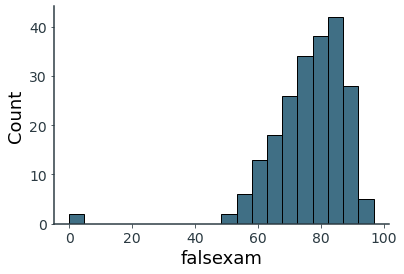

In [3]:
print(data.format_ol.value_counts())
sns.histplot(data.falsexam);

In [4]:
result = smf.ols('falsexam ~ format_ol', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.5475,1.113,70.563,0.000,76.353,80.742
format_ol,-4.9122,1.680,-2.925,0.004,-8.223,-1.601


# Multivariate Linear Regression

In [5]:
wage = pd.read_csv("../data/wage.csv").dropna()
wage.sample(5)

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
830,750,50,2.708050,103,15,1,1,37,1,0,1,0,1,1.0,12.0,9.0
535,1442,40,3.584907,132,17,8,1,33,1,0,1,1,3,1.0,8.0,12.0
772,1154,40,3.362110,116,15,11,12,34,0,0,0,0,2,1.0,12.0,9.0
156,2404,50,3.872866,106,15,8,0,32,1,0,0,1,2,1.0,12.0,12.0
386,909,40,3.123466,95,13,6,2,31,1,0,0,1,2,1.0,12.0,12.0


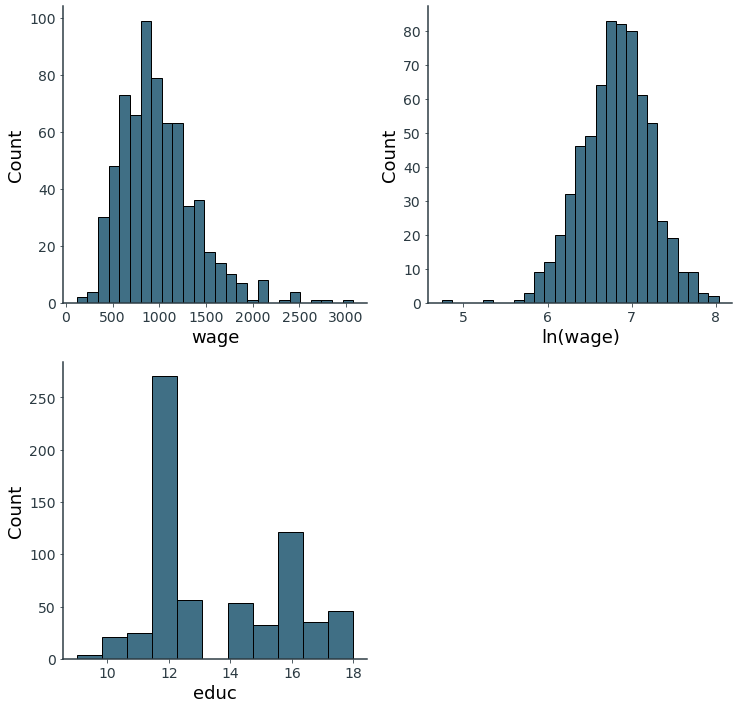

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(wage.wage, ax=ax[0][0])
sns.histplot(wage.wage.apply(np.log), ax=ax[0][1])
ax[0][1].set_xlabel("ln(wage)")
sns.histplot(wage.educ, ax=ax[1][0])
ax[1][1].set_visible(False);

In [7]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black',
            'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']
model = smf.ols('lhwage ~ educ +'+"+".join(controls), data=wage).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1156,0.232,4.802,0.000,0.659,1.572
educ,0.0411,0.010,4.075,0.000,0.021,0.061
IQ,0.0038,0.001,2.794,0.005,0.001,0.006
exper,0.0153,0.005,3.032,0.003,0.005,0.025
tenure,0.0094,0.003,2.836,0.005,0.003,0.016
age,0.0086,0.006,1.364,0.173,-0.004,0.021
married,0.1795,0.053,3.415,0.001,0.076,0.283
black,-0.0801,0.063,-1.263,0.207,-0.205,0.044
south,-0.0397,0.035,-1.129,0.259,-0.109,0.029
urban,0.1926,0.036,5.418,0.000,0.123,0.262
